## Изучение данных из файла

In [358]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [359]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [360]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

- Информация о структуре данных - двумерная(DataFrame);
- таблица имеет 23699 строк и 22 столбца; 
- присутствуют названия столбцов и количество ненулевых значений;
- в таблице присутствуют значения типов object(3 столбца), int(3 столбца), float(14 столбцов) и bool(2 столбца);
- использование памяти.

Пропуски наблюдаются во многих столбцах, далее в предобработке данных будем заполнять пропуски по мере необходимости.

## Предобработка данных

In [361]:
data['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

Вывод: В данном столбце нет пропусков, единственное есть число фотографий квартиры в объявлении 0, но это не помешает анализу.

In [362]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64

In [363]:
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

Вывод: в данном столбце пропусков не обнаружено, большинство объявлений с ценой 4 500 000 на момент снятия с публикации. Заменила тип данных на int.

In [364]:
data['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

In [365]:
data[data['total_area'] > 539]['total_area'].value_counts()

631.2    1
900.0    1
618.0    1
590.0    1
631.0    1
Name: total_area, dtype: int64

Вывод: В Санкт-Петербурге обнаружена самая большая площадь квартиры 539 кв.м, поэтому все значения выше данной площади заменяем на 539 кв.м

In [366]:
data.loc[data['total_area'] > 539, 'total_area'] = 539

Вывод: в данном столбце пропусков не обнаружено, большинство объявлений с площадью квартиры 45 квадратный метров, но если посмотреть на таблицу, где к датафрейму применяли метод describe(), можно заметить, что среднее значение это 60.3 кв.м, а медианное - 52 кв.м, эти данные нам понадобяться в исследовательском анализе.

In [367]:
data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2016-09-05T00:00:00      1
2015-09-08T00:00:00      1
2016-07-21T00:00:00      1
2015-10-06T00:00:00      1
2017-01-03T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

Вывод: в данном столбце пропусков не обнаружено, большинство объявлений было выставлено 1 февряля 2018 года, данный столбец будем применять в исследовательском анализе.

In [368]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Вывод: в данном столбце пропусков не обнаружено, но видно, что есть аномальные значения, где большое количество комнат, с такими данными будем разбираться в исследовательском анализе.

In [369]:
data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

Вывод: в данном столбце обнаружены пропуски, также присутствуют аномальные значения высоты потолков в квартире.

In [370]:
data[data['ceiling_height'] < 2.5]['ceiling_height'].value_counts()

2.40    23
2.45    15
2.00    11
2.48     8
2.30     4
2.47     3
2.46     2
2.20     1
1.20     1
2.49     1
2.34     1
1.00     1
2.25     1
1.75     1
Name: ceiling_height, dtype: int64

In [371]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

In [372]:
data[data['ceiling_height'] > 5]['ceiling_height'].value_counts()

27.0     8
25.0     7
8.0      3
32.0     2
5.3      2
20.0     1
24.0     1
26.0     1
5.5      1
14.0     1
22.6     1
5.8      1
27.5     1
100.0    1
10.3     1
5.6      1
8.3      1
5.2      1
6.0      1
Name: ceiling_height, dtype: int64

In [373]:
ceiling_height_median = data[data['ceiling_height'] <= 5]['ceiling_height'].median()
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = ceiling_height_median
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

In [374]:
data['ceiling_height'].isna().sum()

0

Вывод: в среднем в России высота потолков от 2.5 до 4.5-5.0, я взяла крайние значения, все значения, которые < 2.5 заменила на 2.5, которые > 5 заменила на медианное значение тех, которые <= 5.

In [375]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [376]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'] = data['floors_total'].astype('int')

Заменила пропуски медианным значением столбца. Изменила тип данных на int.

In [377]:
data['floors_total'].isna().sum()

0

In [378]:
data['living_area'].value_counts()

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
20.03      1
10.55      1
24.83      1
20.97      1
15.55      1
Name: living_area, Length: 1782, dtype: int64

In [379]:
data[data['living_area'] < 6]['living_area'].value_counts()

2.0    2
3.0    2
5.4    1
5.0    1
Name: living_area, dtype: int64

In [380]:
data.loc[data['living_area'] < 6, 'living_area'] = 6
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [381]:
data['living_area'].isna().sum()

0

Вывод: В России по учетным нормам минимальная жилая площадь составляет 6 кв.м, поэтому все значения, которые < 6 поменяла на 6. Пропуски заполнила медианнным значением столбца.

In [382]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

Вывод: в данном столбце не обнаружены пропуски.

In [383]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [384]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Вывод: в данном столбце обнаружено много пропусков, но запонять их не будем, так как данный столбец не актуален для анализа. Изменила тип данных на bool.

In [385]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Вывод: в данном столбце не обнаружены пропуски, данный столбец может понадобиться для более точного заполнения пропусков в других столбцах.

In [386]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Вывод: в данном столбце не обнаружены пропуски, данный столбец может понадобиться для более точного заполнения пропусков в других столбцах.

In [387]:
data['kitchen_area'].value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
18.07       1
28.20       1
37.90       1
9.51        1
35.40       1
Name: kitchen_area, Length: 971, dtype: int64

In [388]:
data[data['kitchen_area'] < 5]['kitchen_area'].value_counts()

4.00    25
4.90    12
4.80    11
4.50     9
2.00     7
3.00     7
4.70     6
4.60     4
3.50     4
4.10     3
3.80     3
4.20     3
4.40     2
3.70     1
3.20     1
4.30     1
2.30     1
3.40     1
2.89     1
1.30     1
3.30     1
2.40     1
Name: kitchen_area, dtype: int64

In [389]:
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = 5
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [390]:
data['kitchen_area'].isna().sum()

0

Вывод: В России по учетным нормам минимальная площадь кухни составляет 5 кв.м, поэтому все значения, которые < 5 поменяла на 5. Пропуски заполнила медианнным значением столбца.

In [391]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [392]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [393]:
data['balcony'].isna().sum()

0

Вывод: в данном столбце обнаружены пропуски, вероятнее всего человек не указал количество балконов, вероятнее всего их нет, заменила все пропуски на 0. Зменила тип данных на int.

In [394]:
data['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Лупполово                 1
деревня Хязельки                  1
садовое товарищество Садко        1
посёлок Левашово                  1
поселок Гладкое                   1
Name: locality_name, Length: 364, dtype: int64

In [395]:
data['locality_name'] = data['locality_name'].str.lower()

Вывод: привела все к нижнему регистру.

In [396]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].fillna('')

Вывод: в строках заменила все буквы "ё" на "е", а также в столбце было выявлено одно значение NaN его заменила на пустую строку.

In [397]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Вывод: вывела все уникальные значения, чтобы посмотреть, все ли преобразования сработали.

In [398]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
25122.0     1
26768.0     1
22248.0     1
20475.0     1
14579.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [399]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = data['airports_nearest'].median()
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

In [400]:
data['airports_nearest'].isna().sum()

0

Вывод: в первом шаге проекта методом describe() было выявлено, что минимальное расстояние до ближайшего аэропорта 0 м, такого быть не может,  поэтому заменила все значения равные 0 медианным значением столбца. Также остальные пропуски заполнила медианным значением.

In [401]:
data['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
13104.0     1
11280.0     1
27218.0     1
10501.0     1
208.0       1
Name: cityCenters_nearest, Length: 7642, dtype: int64

In [402]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

In [403]:
data['cityCenters_nearest'].isna().sum()

0

Вывод: пропуски в данном столбце заменила медианным значением столбца.

In [404]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [405]:
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [406]:
data['parks_around3000'].isna().sum()

0

Вывод: в данном столбце обнаружены пропуски, заполнила их медианным значением данного столбца. Заменила тип данных на int.

In [407]:
data['parks_nearest'].value_counts()

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
863.0      1
2880.0     1
969.0      1
1011.0     1
775.0      1
Name: parks_nearest, Length: 995, dtype: int64

In [408]:
data.loc[data['parks_nearest'] == 1, 'parks_nearest'] = data['parks_nearest'].median()
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

In [409]:
data['parks_nearest'].isna().sum()

0

Вывод: изучив таблицу, увидела, что есть значение где расстояние до ближайшего парка 1 м, аномальное значение, поэтому заменю его на медианное, оно такое одно. Также все пропуски заполнила медианным значением.

In [410]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [411]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [412]:
data['ponds_around3000'].isna().sum()

0

Вывод: в данном столбце обнаружены пропуски, заполнила их медианным значением данного столбца. Заменила тип данных на int.

In [413]:
data['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
742.0      1
1019.0     1
948.0      1
1275.0     1
193.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

In [414]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

In [415]:
data['ponds_nearest'].isna().sum()

0

Вывод: в данном столбце обнаружены пропуски, заполнила их медианным значением данного столбца.

In [416]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [417]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].astype('int')

In [418]:
data['days_exposition'].isna().sum()

0

Вывод: в данном столбце были обнаружены пропуски, заполниа их медианным значением столбца. Заменила тип данных на int.

## Расчёты и добавление результатов в таблицу

In [419]:
data['price_for_1_sqm'] = data['last_price'] / data['total_area']

Нашла цену за 1 квадратный метр.

In [420]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

Сначала перевела столбец из типа данных 'object' в дату и время методом to_datetime(), затем добавила в таблицу три столбца (год, месяц и день недели).

In [421]:
def floor_group_total(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_apart'] = data.apply(floor_group_total, axis=1)

Написав функцию полученила новый столбец, который показывает какой этаж(первый, последний или другой).

In [422]:
data['living_total_area'] = data['living_area'] / data['total_area']
data['kitchen_total_area'] = data['kitchen_area'] / data['total_area']

Нашла соотношение жилой и общей площади, а также отношение площади кухни к общей площади. 

## Исследовательский анализ данных

In [423]:
import matplotlib.pyplot as plt

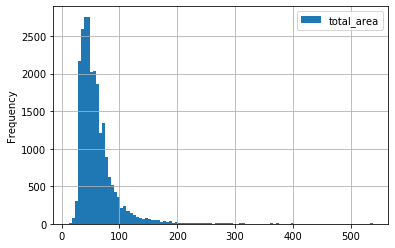

In [424]:
data.plot(kind='hist', y='total_area', bins=100, grid=True)
plt.show()

Вывод: на гистограмме видно, что в основном площадь квартиры составляет от 10 кв.м до 100 кв.м. Есть конечно квартиры, у которых площадь свыше 190 кв.м, но таких совсем немного.

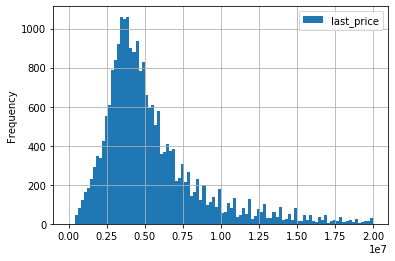

In [425]:
data.plot(kind='hist', y='last_price', range=(1,20000000), bins=100, grid=True)
plt.show()

Вывод: Убрали выброс в качестве 0 и получили гистограмму, видим, что большинство квартир стоимостью в диапазоне от 2,5 млн до 5 млн.

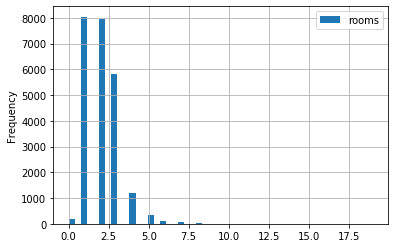

In [426]:
data.plot(kind='hist', y='rooms', bins=50, grid=True)
plt.show()

Вывод: число комнат в основном 1, 2 и 3 пиковые значения, еще проскальзывает 4.

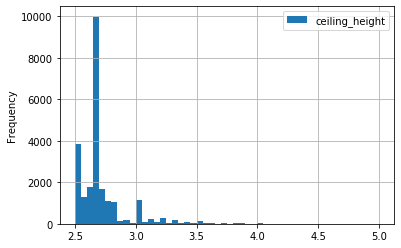

In [427]:
data.plot(kind='hist', y='ceiling_height', bins=50, grid=True)
plt.show()

Вывод: высота потолков на пике 2.65, также чаще встречаются 2.5

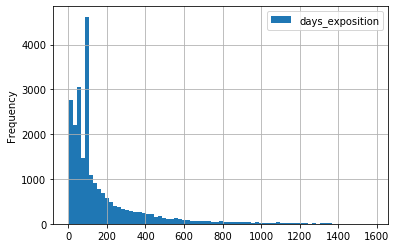

In [428]:
data.plot(kind='hist', y='days_exposition', bins=75, grid=True)
plt.show()

Вывод: на гистограмме 3 пиковый значения(20, 60, и 100).

In [429]:
display(data['days_exposition'].mean())

169.36022616988058

In [430]:
display(data['days_exposition'].median())

95.0

Вывод: чем ближе значение к 0 тем быстрее продается квартира, видим, что есть объявления, которые висят очень долго доходит и до 4 лет ожидания (1460 дней).

In [431]:
group_days_exposition = data.pivot_table(index='month', values='days_exposition', aggfunc=['median', 'mean'])
group_days_exposition.columns = ['days_exposition_median', 'days_exposition_mean']
group_days_exposition

,days_exposition_median,days_exposition_mean
month,,
1,95,174.157333
2,95,159.700379
3,95,177.387708
4,95,162.131568
5,115,208.755887
6,105,190.220455
7,95,169.510914
8,95,149.865826
9,95,160.626956


Вывод: из таблицы видим, что быстрее всего продажа квартир шла в ноябре месяце, а самые долгие продажи в мае и декабре. В мае из-за того что вот вот наступит лето отпуска(трата финансов), поэтому не особо есть спрос на квартиры, а в декабре всегда цены взлетают под Новый год и людям невыгодно покупать квартиру, поэтому ждут обвал цен. Покупают чаще всего как уже выше написано в ноябре, думаю что как раз в ноябре цены еще не так высоки как перед новым годом.

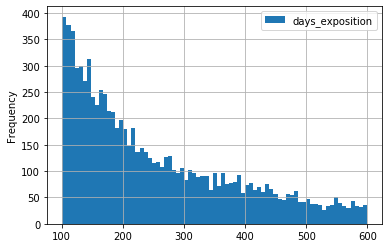

In [432]:
days_exposition_query = data.query('days_exposition > 100')
days_exposition_query = days_exposition_query.query('days_exposition < 600')
days_exposition_query.plot(kind='hist', y='days_exposition', bins=75, grid=True)
plt.show()

Вывод: после среза данных видим, что гистограмма гладкая без резких выбросов.

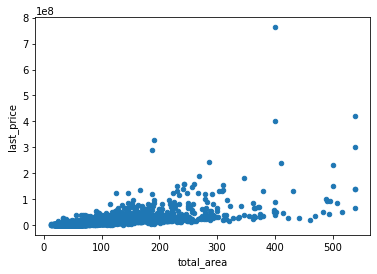

In [433]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=1)
plt.show()

Вывод: чем больше площадь квартиры тем дороже она стоит.

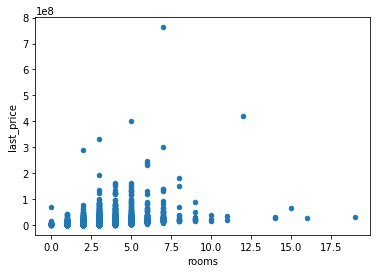

In [434]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=1)
plt.show()

Вывод: чем больше комнат в квартире тем дороже она стоит. После 5-ти комнат уже аномальные значения.

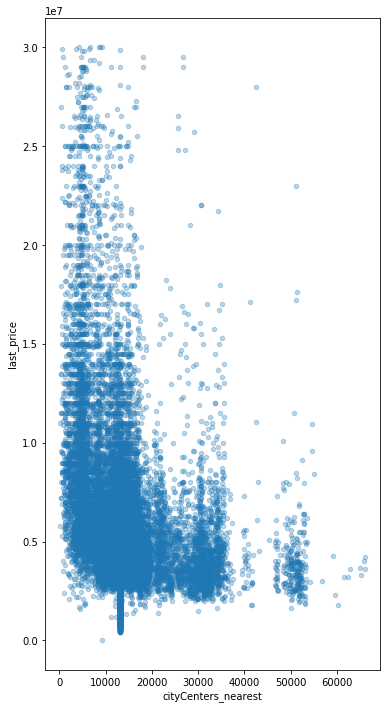

In [435]:
last_price_query = data.query('last_price < 30000000')
last_price_query.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3, figsize=(6,12))
plt.show()

Вывод: чем ближе квартира к центру тем дороже она стоит.

In [436]:
price_for_1_sqm_mean = data.pivot_table(index=['locality_name'], values='price_for_1_sqm', aggfunc=['count','mean'])
price_for_1_sqm_mean.columns = ['count', 'mean']
price_for_1_sqm_mean = price_for_1_sqm_mean.sort_values('count', ascending=False).head(10)
price_for_1_sqm_mean

,count,mean
locality_name,,
санкт-петербург,15721,114878.901194
поселок мурино,556,85681.762601
поселок шушары,440,78677.364217
всеволожск,398,68654.473986
пушкин,369,103125.819291
колпино,338,75424.579098
поселок парголово,327,90175.913458
гатчина,307,68746.146763
деревня кудрово,299,92473.547576


Вывод: нашла среднюю цену за 1 кв м первых 10-ти населенных пунктов с наибольшим количеством объявлений.

In [437]:
price_max_min = data.pivot_table(index=['locality_name'], values='last_price', aggfunc=['max', 'min'])
price_max_min.columns = ['max', 'min']
price_max_min = price_max_min.sort_values('max', ascending=False)
price_max = price_max_min['max'].max()
max_result = price_max_min[price_max_min['max'] == price_max]
max_result

,max,min
locality_name,,
санкт-петербург,763000000,12190


In [438]:
price_min = price_max_min['min'].min()
min_result = price_max_min[price_max_min['min'] == price_min]
min_result

,max,min
locality_name,,
санкт-петербург,763000000,12190


Вывод: по данной таблице видно, что самая высокая цена за жилье в Санкт-Петербурге, а самая низкая также в Санкт-Петербурге.

In [439]:
df_spb = data[data['locality_name'] == 'санкт-петербург']
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_1_sqm,year,month,weekday,floor_apart,living_total_area,kitchen_total_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,2,755.0,95,120370.370370,2019,3,3,другой,0.472222,0.231481
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,2,574.0,558,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.0,9,True,...,3,234.0,424,408176.100629,2015,7,4,другой,0.188679,0.057233
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,1,48.0,121,100000.000000,2018,6,1,другой,0.320000,0.410000
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.0,22,True,...,0,502.0,95,110544.692737,2019,4,3,другой,0.418994,0.263966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,True,...,2,652.0,29,100566.572238,2018,2,2,другой,0.461756,0.257790
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.0,2,True,...,0,502.0,15,105769.230769,2018,7,3,другой,0.596154,0.115385
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,1,806.0,519,129903.978052,2016,10,3,другой,0.552812,0.145405
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,3,381.0,95,72490.845228,2017,3,1,другой,0.547792,0.103356


In [440]:
df_spb['km'] = df_spb['cityCenters_nearest'] / 1000

df_spb['km'] = df_spb['km'].round().astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [441]:
df_spb_price_km = df_spb.pivot_table(index='km', values='last_price')
df_spb_price_km

,last_price
km,
0,3.144912e+07
1,2.120672e+07
2,1.778832e+07
3,1.112658e+07
4,1.330428e+07
5,1.449912e+07
6,1.533842e+07
7,1.477515e+07
8,9.957717e+06


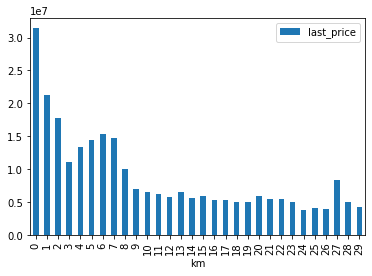

In [442]:
df_spb_price_km.plot(y='last_price', kind='bar', use_index=True)

Вывод: по графику можно сделать вывод, что центр города это от 0 до 8 км.

In [443]:
df_spb_center = df_spb.query('km <= 8')
df_spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_1_sqm,year,month,weekday,floor_apart,living_total_area,kitchen_total_area,km
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.0,9,True,...,234.0,424,408176.100629,2015,7,4,другой,0.188679,0.057233,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121,100000.000000,2018,6,1,другой,0.320000,0.410000,8
24,8,6500000,97.20,2015-10-31,2,2.65,3,46.5,1,True,...,124.0,265,66872.427984,2015,10,5,первый,0.478395,0.201646,2
35,6,15500000,149.00,2017-06-26,5,2.65,5,104.0,4,True,...,779.0,644,104026.845638,2017,6,0,другой,0.697987,0.114094,4
51,7,45000000,161.00,2017-10-17,3,3.20,8,38.0,4,True,...,99.0,541,279503.105590,2017,10,1,другой,0.236025,0.310559,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000,47.00,2016-05-20,1,2.65,6,18.2,1,False,...,519.0,131,90425.531915,2016,5,4,первый,0.387234,0.310638,5
23681,13,5250000,43.00,2018-05-11,2,2.50,5,29.0,2,True,...,660.0,80,122093.023256,2018,5,4,другой,0.674419,0.139535,7
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.0,2,True,...,502.0,15,105769.230769,2018,7,3,другой,0.596154,0.115385,6
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,806.0,519,129903.978052,2016,10,3,другой,0.552812,0.145405,4


17% из 100% объявлений это квартиры входящие в центр города.

In [444]:
df_spb_center.pivot_table(index='locality_name', values=['total_area', 'last_price', 'rooms', 'ceiling_height'])

,ceiling_height,last_price,rooms,total_area
locality_name,,,,
санкт-петербург,2.911366,1.418037e+07,2.757885,90.162855


In [445]:
df_spb.pivot_table(index='locality_name', values=['total_area', 'last_price', 'rooms', 'ceiling_height'])

,ceiling_height,last_price,rooms,total_area
locality_name,,,,
санкт-петербург,2.722153,8.062507e+06,2.171618,64.70854


Вывод: по сравнению со всем городом в центре города цены на квартиры почти в 2 раза выше и в основном в центре покупают квартиры большей площади.

In [446]:
df_spb_center_1 = df_spb_center.pivot_table(index='last_price', values=['rooms', 'floor', 'km'])
df_spb_center_1.sort_values('last_price', ascending=False)

,floor,km,rooms
last_price,,,
763000000,10.0,4.0,7.0
420000000,25.0,8.0,12.0
401300000,9.0,2.0,5.0
330000000,5.0,1.0,3.0
300000000,5.0,5.0,7.0
...,...,...,...
1900000,2.0,6.0,1.0
1850000,2.0,5.0,1.0
1800000,2.0,5.0,5.0


Вывод: на стоимость жилья исходя из данных в таблице, влияет только этаж, чем выше этаж тем дороже квартира.

## Общий вывод


Вывод можно сделать такой, что все квартиры которые в центре они дорогие, чем дальше тем дешевле. Соответственно факторы влияющие на стоимость квартиры разные, далеко не все столбцы влияют на стоимость квартиры, из всего анализа заметно влияют: удаленность от центра, этаж, площадь квартиры, также от населенного пункта. В данных присутствовали и аномальные значения, н-р, площадь квартиры, были значения более 600 кв.м, такое конечно может быть, если соединять несколько квартир на этаже в общую площадь, но в наших данных это были аномальные значения, еще цена, было не мало пунктов со значением 0, также присутвовали и огромные суммы за квартиру, думаю что это либо просто опечатка, человеческий фактор при заполнении данных либо мошенническая деятельность, с которой нужно бороться.